In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob

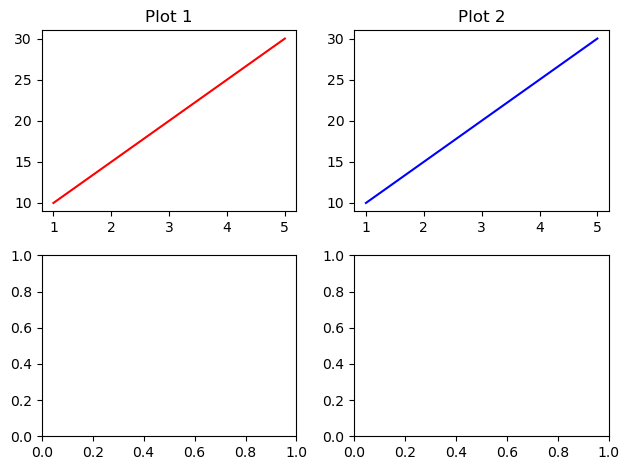

In [1]:
import matplotlib.pyplot as plt

# Create some data
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 20, 25, 30]
y2 = y1 #[5, 10, 15, 20, 25]

# Create a figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=2)

# Plot data on each subplot
axs[0, 0].plot(x, y1, 'r-')
axs[0, 0].set_title('Plot 1')

axs[0, 1].plot(x, y2, 'b-')
axs[0, 1].set_title('Plot 2')

# You can continue to plot more data on other subplots if needed

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

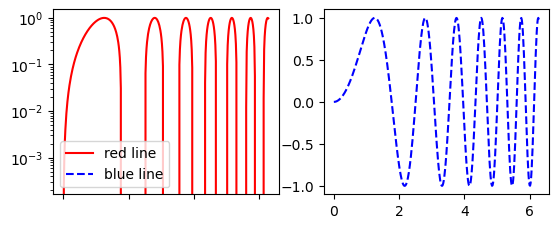

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig = plt.figure()
# set height ratios for subplots
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1]) 

# the first subplot
ax0 = plt.subplot(gs[0])
# log scale for axis Y of the first subplot
ax0.set_yscale("log")
line0, = ax0.plot(x, y, color='r')

# the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
line1, = ax1.plot(x, y, color='b', linestyle='--')
plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

# put legend on first subplot
ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
plt.show()

In [5]:
hdpath = '/media/bartosz/USB STICK/highz_data/'
hfpath = hdpath + 'fits/sigma_clipped/'
hnpath = hdpath + 'normed/sigma_clipped/'

def plot_xdata(idx,fig,ax,c,lw):
    filename = glob.glob(hnpath + '{}_norm.txt'.format(idx))[0]
    normed = np.loadtxt(filename)

    norm_wl = normed[:,0]
    norm_flux = normed[:,1]
    norm_sig = normed[:,2]
    #ax.plot(norm_wl,norm_sig,linewidth=lw*0.8,drawstyle='steps-mid',color=c,alpha=0.5,label='errors')
    ax.plot(norm_wl,norm_flux,linewidth=lw, drawstyle='steps-mid', color=c,alpha=0.5,label='normed observation')
    
    return

def plot_xfit(idx,fig,ax,c,lw):

    filename = glob.glob(hfpath + '{}_*.txt'.format(idx))[0]
    fit = np.loadtxt(filename)

    fit_wl = fit[:,0]
    fit_flux = fit[:,1]

    mask1 = fit_wl > 1250
    mask2 = fit_wl < 2250
    mask = np.logical_and(mask1,mask2)

    ax.plot(fit_wl,fit_flux,linewidth=lw, drawstyle='steps-mid', color=c,label='spline fit')
    #ax.axvspan(min(min(norm_wl),min(fit_wl)),1250,alpha=0.2,facecolor='grey')
    #ax.axvspan(2250,max(max(norm_wl),max(fit_wl)),alpha=0.2,facecolor='grey')
    #ax.set_xlim(left=min(min(norm_wl),min(fit_wl)),right=max(max(norm_wl),max(fit_wl)))
    return max(fit_flux[mask])


lfpath = '/media/bartosz/USB STICK/BOSS_DR14/fits/'
lnpath = '/media/bartosz/USB STICK/BOSS_DR14/normed/'

def plot_fit(idx,fig,ax,c,lw):

    filename = glob.glob(lfpath + '{}_*_0_dpx25.txt'.format(idx))[0]
    fit = np.loadtxt(filename)

    fit_wl = fit[:,0]
    fit_flux = fit[:,1]

    mask1 = fit_wl > 1250
    mask2 = fit_wl < 2250
    mask = np.logical_and(mask1,mask2)

    ax.plot(fit_wl,fit_flux,linewidth=lw, drawstyle='steps-mid', color=c, alpha=0.6,label='idx {}'.format(idx))
    return max(fit_flux[mask])


def plot_norm(idx,fig,ax,c):
    filename = glob.glob(lnpath + '{}_*_norm.txt'.format(idx))[0]
    norm = np.loadtxt(filename)
    
    norm_wl = norm[:,0]
    norm_flux = norm[:,1]

    ax.plot(norm_wl,norm_flux,linewidth=0.4, drawstyle='steps-mid', color=c, alpha=0.6) #, label='norm. data')
    return

    
def func(z):
    def func2(x):
        return x*(1+z)
    return func2

def inv(z):
    def inv2(x):
        return x/(1+z)
    return inv2

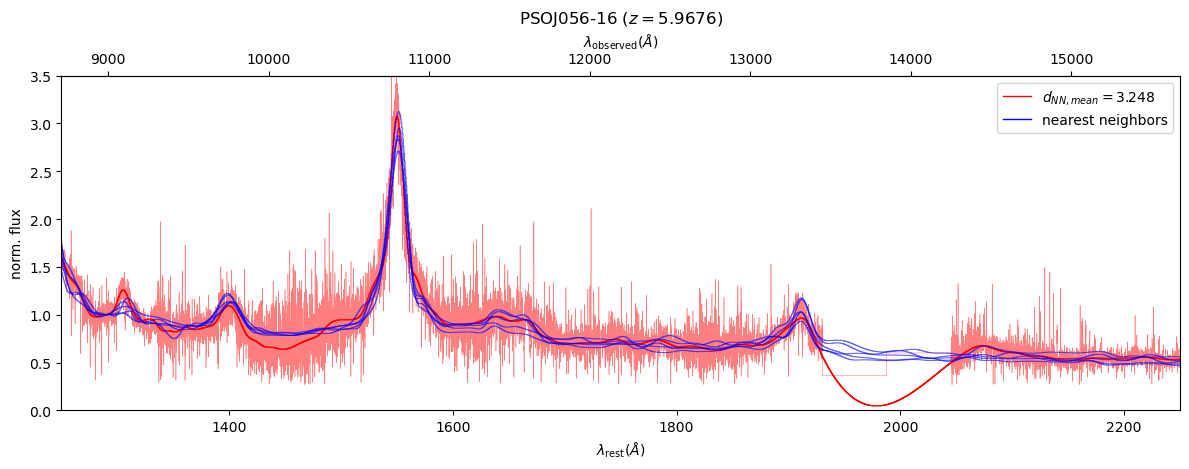

In [17]:
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color='r', lw=1),
                Line2D([0], [0], color='b', lw=1)]



z =  5.9676 #6.02 #6.1456
dmean = np.mean([3.194506121300424 ,3.2269624590764656,	3.233967506391231,	3.2655120258028014,	3.3192018971480675])  #np.mean([1.0215876088820603,1.0804486366085282,	1.1282840364908024,	1.141484546620482,	1.1703469722300683 ]) #np.mean([3.5218537822631513 ,3.558982469636067 ,3.601671546987285,	3.6789086735744703 ,3.725048900039639])
qname = 'PSOJ056-16'#'SDSSJ1306+0356' #'VIKJ2318-3029'  
nn1,nn2,nn3,nn4,nn5 =118340 ,342807 ,105486 ,110948 ,60581 #347622,383988,69148,113000,437077 #298518 ,348452 ,361298 ,125350 ,154666  #
fig,ax = plt.subplots()
fig.set_figwidth(12)
plot_xdata(qname,fig,ax,'red',0.4)
plot_xfit(qname,fig,ax,'red',1)
#plot_norm(222565,fig,ax,'blue')
plot_fit(nn1,fig,ax,'b',0.8)
plot_fit(nn2,fig,ax,'b',0.8)
plot_fit(nn3,fig,ax,'b',0.8)
plot_fit(nn4,fig,ax,'b',0.8)
plot_fit(nn5,fig,ax,'b',0.8)
ax.set_ylim(0,3.5)
ax.set_xlim(1250,2250)
ax.set_xlabel('$\lambda_\mathrm{rest} (\AA)$')
ax.set_ylabel('norm. flux')
sax = ax.secondary_xaxis('top', functions=(func(z),inv(z)))
sax.set_xlabel('$\lambda_\mathrm{observed} (\AA)$')
ax.legend(custom_lines, ['$d_{{NN,mean}}={:.3f}$'.format(dmean), 'nearest neighbors'])
plt.title(qname + ' ($z={}$)'.format(z))
plt.tight_layout()
plt.savefig('plots/eg_{}.pdf'.format(qname), format='pdf')
plt.show()
plt.close()

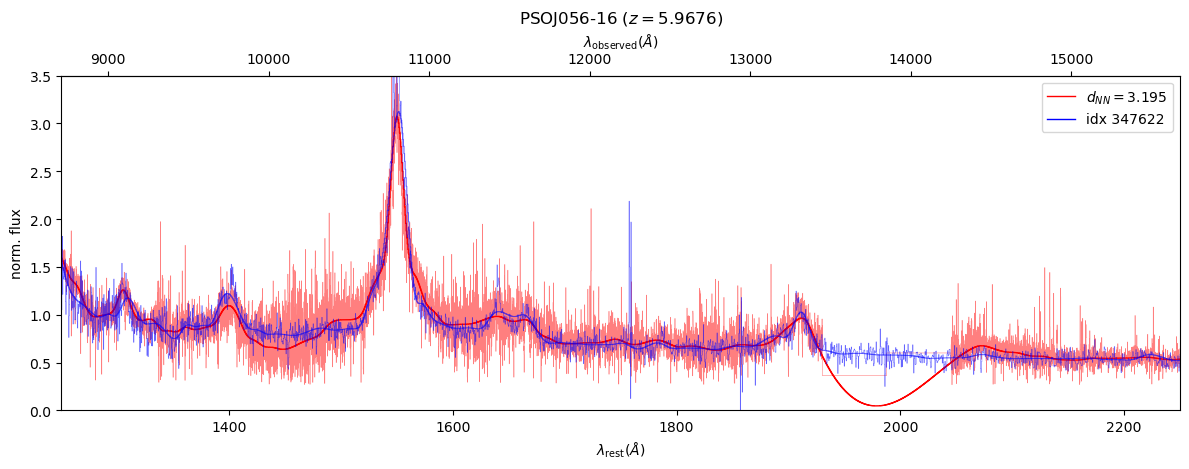

In [15]:
fig,ax = plt.subplots()
fig.set_figwidth(12)
plot_xdata(qname,fig,ax,'red',0.4)
plot_xfit(qname,fig,ax,'red',1)
plot_norm(nn1,fig,ax,'blue')
plot_fit(nn1,fig,ax,'b',0.8)
# plot_fit(383988,fig,ax,'b',0.8)
# plot_fit(69148,fig,ax,'b',0.8)
# plot_fit(113000,fig,ax,'b',0.8)
# plot_fit(437077,fig,ax,'b',0.8)
ax.set_ylim(0,3.5)
ax.set_xlim(1250,2250)
ax.set_xlabel('$\lambda_\mathrm{rest} (\AA)$')
ax.set_ylabel('norm. flux')
sax = ax.secondary_xaxis('top', functions=(func(z),inv(z)))
sax.set_xlabel('$\lambda_\mathrm{observed} (\AA)$')
ax.legend(custom_lines, ['$d_{{NN}}={:.3f}$'.format(3.194506121300424), 'idx 347622'],loc='upper right')   #1.0215876088820603  #3.5218537822631513
plt.title(qname + ' ($z={}$)'.format(z))
plt.tight_layout()
plt.savefig('plots/eg_{}_NN.pdf'.format(qname), format='pdf')
plt.show()
plt.close()

In [ ]:
dpath= '/media/bartosz/Volume/BOSS_DR14/data/'
dnn = np.loadtxt(dpath + 'nearest_neighbors_nonBALs_2.txt')
didx = dnn[:,0]
dnn_idx = dnn[:,2:7]
dnn_d = dnn[:,8:13]
dd_mean = np.array([np.mean(d) for d in dnn_d])


dpath = '/media/bartosz/Volume/XQR30/data/'
fpath = dpath + 'fits/'
npath = dpath + 'normed/'

nnfile = np.loadtxt(dpath + 'highZ_NN_trim.txt',dtype='str')
qnames = nnfile[:,0]
nn_IDs = nnfile[:,1:6]
nn_Ds = nnfile[:,6:]

nnfile_prev = np.loadtxt(dpath + 'highZ_NN.txt',dtype='str')
nn_Ds_prev = nnfile_prev[:,6:]

Xmeta = np.loadtxt(dpath + 'meta.txt',dtype='str')
Xqnames = Xmeta[:,0]
Z = Xmeta[:,1]
wl1r = [float(wl) for wl in Xmeta[:,2]]
wl2r = [float(wl) for wl in Xmeta[:,3]]

def func(z):
    def func2(x):
        return x*(1+z)
    return func2

def inv(z):
    def inv2(x):
        return x/(1+z)
    return inv2

props = dict(boxstyle='square', facecolor='white', alpha=0.2)
for i,q in enumerate(qnames):    
    qso_idx = np.nonzero(Xqnames == q)[0][0]
    z = float(Z[qso_idx])

    d_mean = np.mean([float(j) for j in nn_Ds[i]])
    d_mean_prev = np.mean([float(j) for j in nn_Ds_prev[i]])
    
    pp = PdfPages('plots/{}_NN.pdf'.format(q))
    fig = plt.figure(0)
    ax = fig.subplots()
    fig.set_figwidth(15)
    plot_xdata(q,fig,ax,'grey',1)
    Ymax = []
    for idx in nn_IDs[i]:
        ymax = plot_fit(int(idx),fig,ax,'red',1)
        Ymax.append(ymax)
    ymax = plot_xfit(q,fig,ax,'black',1)
    Ymax.append(ymax)
    ax.set_ylim(-0.1,1.1*max(Ymax))
    ax.set_xlim(1250,2250)
    ax.set_xlabel('$\lambda_\mathrm{rest} (\AA)$')
    ax.set_ylabel('flux')
    ax.axvspan(wl1r[i], wl2r[i], alpha=0.3, color='red')
    custom = [Line2D([0], [0], color='grey', lw=1),
                Line2D([0], [0], color='black', lw=1),
                Line2D([0], [0], color='red', lw=1)]
    ax.legend(custom, ['observed flux', 'spline fit', 'low-z NN'], loc=1)
    info = '\n'.join((r'{}'.format(q),
                      r'$z={}$'.format(z),
                      r'$d_\mathrm{{NN,mean}}^\mathrm{{trim}}={:.3f}$'.format(d_mean),
                      r'$d_\mathrm{{NN,mean}}^\mathrm{{prev}}={:.3f}$'.format(d_mean_prev)))

    ax.text(0.5, 0.97, info, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='center', bbox=props)
    ax2 = ax.secondary_xaxis('top', functions=(func(z),inv(z)))
    ax2.set_xlabel('$\lambda_\mathrm{observed} (\AA)$')

    plt.show()
    pp.savefig(fig)
    plt.close()
    
    for j,idx in enumerate(nn_IDs[i]):
        sf=plt.figure(1)
        sax=sf.subplots()
        sf.set_figwidth(15)
        plot_xdata(q,sf,sax,'grey',1)
        plot_xfit(q,sf,sax,'black',1)
        plot_data(idx,sf,sax,'blue',1)
        plot_fit(idx,sf,sax,'red',1)
        sax.set_ylim(-0.1,1.1*max(Ymax)) 
        sax.set_xlim(1250,2250)
        sax.axvspan(wl1r[i], wl2r[i], alpha=0.3, color='red')
        sax.set_xlabel('$\lambda_{rest} (\AA)$')
        sax.set_ylabel('flux')

        scustom = [Line2D([0], [0], color='grey', lw=1),
                    Line2D([0], [0], color='black', lw=1),
                    Line2D([0], [0], color='blue', lw=1),
                    Line2D([0], [0], color='red', lw=1)]
        sax.legend(scustom, ['observed flux', 'spline fit', 'NN observed flux', 'NN spline fit'], loc=1)
        sinfo = '\n'.join((r'{}'.format(q),
                           r'$z={:.3f}$'.format(z),
                           r'$d_\mathrm{{NN}}={:.3f}$'.format(float(nn_Ds[i][j]))))
        sax.text(0.5, 0.97, sinfo, transform=sax.transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='center', bbox=props)
        z_low = get_z(meta,int(idx))
        sinfo2 = '\n'.join((r'idx: {}'.format(int(idx)),
                            r'$z={:.3f}$'.format(z_low)))
        sax.text(0.7, 0.97, sinfo2, transform=sax.transAxes, fontsize=10,
                     verticalalignment='top', horizontalalignment='center', bbox=props)
        sax2 = sax.secondary_xaxis('top', functions=(func(z),inv(z)))
        sax2.set_xlabel('$\lambda_\mathrm{observed} (\AA)$')
        pp.savefig(sf)       
        plt.close()

    nn = np.loadtxt(dpath + 'eBOSS_NN_trim/{}_NN.txt'.format(q))
    
    idx = nn[:,0]
    
    nn_idx = nn[:,2:7]
    nn_d = nn[:,8:13]
    
    d_mean_eBOSS = np.array([np.mean(d) for d in nn_d])

    bins = np.linspace(0.5, 6.5, 50)
    fig, ax = plt.subplots()

    plt.hist(dd_mean,bins,density=True,alpha=0.5,label=r'$\lambda^\mathrm{{prev}}=2250\mathrm{{\AA}}$',color='tab:orange')
    plt.hist(d_mean_eBOSS,bins, density = True,alpha=0.8,label=r'$\lambda_{{13450}}={:.0f}\mathrm{{\AA}}$'.format(wl1r[i]),color='tab:green')
    plt.axvline(d_mean_prev,color='tab:orange',label='$d_\mathrm{{mean,NN}}^\mathrm{{prev}}={:.3f}$'.format(d_mean_prev))
    plt.axvline(d_mean,color='tab:green',label='$d_\mathrm{{mean,NN}}^\mathrm{{trim}}={:.3f}$'.format(d_mean))
    plt.xlim(0.4,6.5)
    plt.legend()
    plt.xlabel('NN mean distance')
    plt.ylabel('norm. counts')
    plt.title('eBOSS NNs for {}'.format(q))
    
    plt.grid(axis='y', alpha=0.75)
    pp.savefig(fig)
    plt.close()

    pp.close()